In [1]:
#! pip install tensorflow==2.2 #>2.0

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.2.0'

In [4]:
# Checking if i have GPU Enabled
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# Data Augumentation - Creating more data from existing data

In [5]:
# 2 very important preprocessing is Resizing and Rescaling

In [6]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)

In [7]:
# dividing the data into training and validation

In [8]:
train=training_datagenarator.flow_from_directory('D:\Datasets\Fire and Smoke\Training Data',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory('D:\Datasets\Fire and Smoke\Training Data',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='validation')

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


# Now its time to make our CNN 

In [9]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0

# Time to Train our CNN Model 
### Compile and Train

In [15]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('D:\Datasets\Fire and Smoke\models\fire_and_smoke_model.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [14]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

772/772 [==============================] - 839s 1s/step - loss: 0.0704 - accuracy: 0.9852 - val_loss: 0.0270 - val_accuracy: 0.9868


# Lets Test It

In [18]:
from tensorflow.keras.models import load_model
cnn=load_model('D:\Datasets\Fire and Smoke\models\Fire_and_Smoke_model.h5')

In [19]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [88]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [101]:
image_for_testing=r'D:\Datasets\Fire and Smoke\Training Data\Fire\14.jpg'

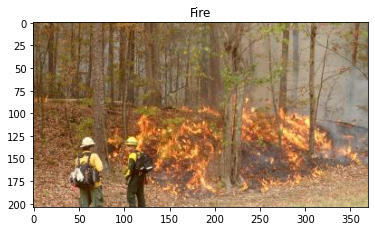

In [102]:
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict_classes(test_image)

Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()